Applications of Spectral Theory:

- Spectral Clustering

- Eigenvector Centralities

Quick introduction to Graph Theory and Complex Networks

- A graph denoted as $G = (V,E)$, is defined by a set of verticies $V = \{v_1, v_2, ..., v_n\}$ and edges $E = \{e_1, e_2,...,e_n\}$.

- Two vertices $v_1, v_2$ are connected together $\iff \exists$ a sequence of edges $<e_1, e_2, .., e_{k-1}>$, such that $v_1 \in e_1$ and $v_k \in e_{k-1}$

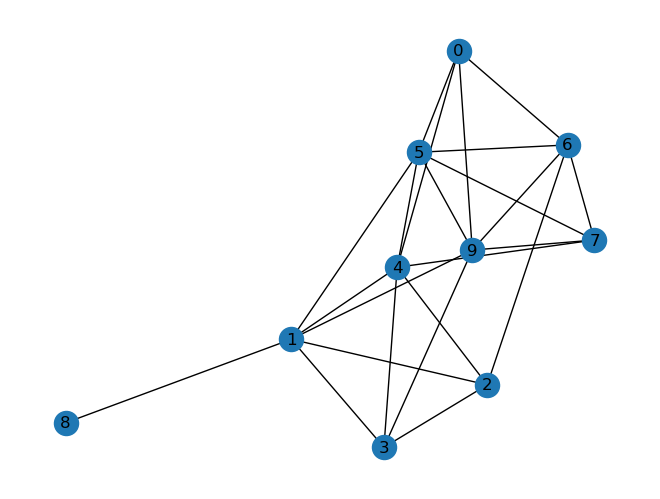

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

K=nx.erdos_renyi_graph(10,0.50)
nx.draw(K, with_labels=True)

Spectral Clustering

1. Start with an adjacency matrix of the generated graph

In [63]:
A = nx.to_numpy_array(K)
A

array([[0., 0., 1., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1., 1., 0.]])

2. Establish a diagonal matrix, $D$, which is the sum of the rows:

In [64]:
import numpy as np
D = np.diag(A.sum(axis=1))
D

array([[4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 6., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 6.]])

3. Determine $D^{\frac{-1}{2}} = d_{ii}^{\frac{-1}{2}}$,

In [65]:
from numpy import inf
D_squared = 1/np.sqrt(D)
D_squared[D_squared == inf] = 0
D_squared

/var/folders/bw/7qdh0ynx0c9bf8j9_sfpt8fw0000gn/T/ipykernel_63514/2675068805.py:2: RuntimeWarning: divide by zero encountered in divide
  D_squared = 1/np.sqrt(D)


array([[0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

4. Get the normalized Laplacian graph $L = I_n - D^{\frac{-1}{2}}AD^{\frac{1}{2}}$

In [66]:
I_n = np.identity(10)
L = I_n - np.matmul(np.matmul(D_squared,A),D_squared)
L

array([[ 1.        ,  0.        , -0.28867513, -0.25      , -0.28867513,
         0.        ,  0.        ,  0.        ,  0.        , -0.20412415],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        -0.28867513, -0.28867513,  0.        ,  0.        , -0.23570226],
       [-0.28867513,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.23570226, -0.23570226],
       [-0.25      ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -0.25      , -0.28867513, -0.20412415,  0.        ],
       [-0.28867513,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        , -0.33333333, -0.23570226,  0.        ],
       [ 0.        , -0.28867513,  0.        ,  0.        ,  0.        ,
         1.        , -0.25      ,  0.        , -0.20412415, -0.20412415],
       [ 0.        , -0.28867513,  0.        , -0.25      ,  0.        ,
        -0.25      ,  1.        ,  0.        

5. Get the eigenvectors and eigenvalues of the graph Laplacian

In [67]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(L)

In [68]:
eigenvalues

array([-2.77555756e-16,  4.64393113e-01,  1.78184855e+00,  7.15058266e-01,
        8.60287876e-01,  9.74134156e-01,  1.05999526e+00,  1.27791834e+00,
        1.46964747e+00,  1.39671698e+00])

In [69]:
eigenvectors

array([[-0.31622777,  0.36840923,  0.4369838 , -0.23579017, -0.14961392,
         0.34436455, -0.53310152,  0.27871734,  0.11075565, -0.05103063],
       [-0.27386128, -0.45937022,  0.10335124, -0.04386249,  0.3071872 ,
         0.20086535, -0.28961251, -0.4017872 , -0.48371884, -0.29558494],
       [-0.27386128,  0.18212361, -0.18945327, -0.5553913 , -0.27693657,
         0.02546018,  0.17385049, -0.38468771, -0.25043417,  0.47875983],
       [-0.31622777,  0.15040943, -0.39729846,  0.45087162, -0.34282385,
         0.44372465,  0.20476664,  0.19582438, -0.30420364, -0.17032188],
       [-0.27386128,  0.38485006, -0.45379429,  0.20320686,  0.22298363,
        -0.48827854, -0.47410608, -0.12783135,  0.0127452 , -0.0158316 ],
       [-0.31622777, -0.4447016 , -0.06680413, -0.04365507,  0.12666524,
        -0.19798311, -0.06200941,  0.64143731, -0.17584256,  0.44093416],
       [-0.31622777, -0.39180823,  0.01345116,  0.31330975, -0.29950554,
         0.08965994, -0.14767342, -0.34076077

- The second eigenvector of the Laplacian graph provides important information about the graph itself:

- It indicates the best cut of the graph.

- We can create a set of vertices such that $S = {v_i \in V|u_2(v)i)<0}$, followed by $T=V\textbackslash S$, creating two groups, one in set $S$, the other in set $T$.

In [70]:
eigenvectors[:, 1]

array([ 0.36840923, -0.45937022,  0.18212361,  0.15040943,  0.38485006,
       -0.4447016 , -0.39180823,  0.31205825, -0.01799583, -0.01935605])

- Nodes 1,3,4,5 and 8 belongs to the same clusters, while nodes 2, 6, 7, 9 and 10 belongs to another cluster.

Assignment

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

<b>Introduction</b><br>
The Salem Witchcraft Website contains eight data sets, however in this case we will be using only one. They provide only a small portion of the historical record about Salem. They do not contain transcripts of examinations or trials or contemporary narrative accounts, for example. Instead, they provide information, primarily of a quantitative nature, about three major aspects of the outbreak: its chronology, its geographic spread, and the social and economic divisions in Salem Village that shaped events. The data were derived primarily from four published sources: Paul Boyer and Stephen Nissenbaum's three-volume transcription of the legal records of the witchcraft trials, The Salem Witchcraft Papers; the new and now authoritative Records of the Salem Witch-Hunt, edited by Bernard Rosenthal, et. al.; Boyer and Nissenbaum's edited collection of documents, Salem-Village Witchcraft; and Salem Village's Book of Record, which contain tax records and other information relating to Salem Village. Photocopies of the original Salem Village record book and church records were examined at the Danvers Archival Center.

C:\Users\punch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustered Data:
             Accused Witch        Residence  Month of Accusation  \
0           Abbott, Arthur         Ipswich                     5   
1    Abbott, Nehemiah, Jr.       Topsfield                     4   
2              Alden, John          Boston                     5   
3           Andrew, Daniel   Salem Village                     5   
4          Barker, Abigail         Andover                     9   
..                     ...              ...                  ...   
147           Wilds, Sarah       Topsfield                     4   
148          Wilford, Ruth       Haverhill                     8   
149          Willard, John   Salem Village                     5   
150      Wilson, Sarah Jr.         Andover                     9   
151      Wilson, Sarah Sr.         Andover                     9   

     Month of Execution  Sort  Cluster  
0                   NaN     1        0  
1                   NaN     2        0  
2                   NaN     3        0  
3  

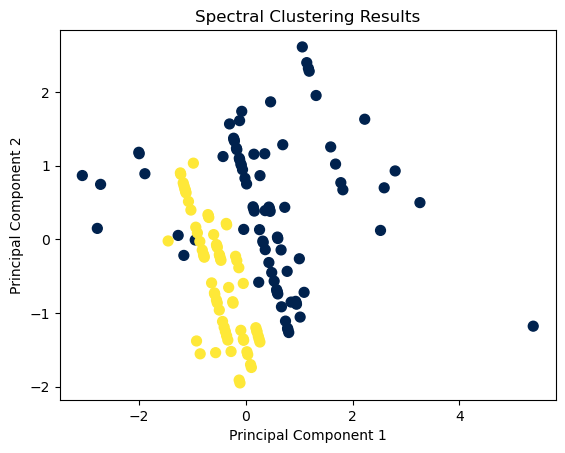

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA






data = pd.read_csv('Accused-Witches-Data-Set.csv')

data.columns = data.columns.str.strip()

numeric_data = data[['Month of Accusation', 'Month of Execution', 'Sort']].copy()

imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

pca = PCA(n_components=2)
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(numeric_data_scaled)

data['Cluster'] = labels

selected_columns = ['Accused Witch', 'Residence', 'Month of Accusation', 'Month of Execution', 'Sort', 'Cluster']
print("Clustered Data:")
print(data[selected_columns])


plt.scatter(numeric_data_pca[:, 0], numeric_data_pca[:, 1], c=labels, s=50, cmap='cividis')
plt.title('Spectral Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


<b>Conclusion</b><br>
It can be concluded that although plenty of people were accused of practicing witchcraft, not all of them were executed.

Eigenvector Centrality

- In graph theory, eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

- Eigen

In [73]:
centrality = nx.eigenvector_centrality(K)
centrality

{0: 0.2876355714244018,
 1: 0.253989577831513,
 2: 0.27218265678299575,
 3: 0.29790693027640525,
 4: 0.22415117792508008,
 5: 0.3380170959356353,
 6: 0.3133051686761221,
 7: 0.22356013979379064,
 8: 0.44096454212820196,
 9: 0.4275919020468911}

In [78]:
eigenvalues, eigenvectors = LA.eig(A)

In [79]:
eigenvalues

array([ 4.24785809, -3.13154173,  1.86942436, -1.91573914, -1.56963994,
       -1.        ,  1.08840459, -0.22035826,  0.10610804,  0.52548398])

In [82]:
eigenvectors[:, 0]

array([-0.28763455, -0.25399062, -0.27218211, -0.29790653, -0.22415028,
       -0.33801816, -0.31330612, -0.22355941, -0.4409646 , -0.42759184])

Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

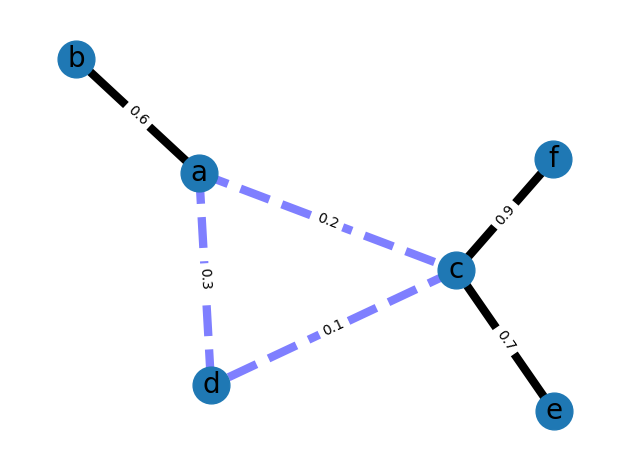

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [5]:
nx.eigenvector_centrality(G)

{'a': 0.51807347662071,
 'b': 0.21182192277183212,
 'c': 0.5986761070959697,
 'd': 0.4566010978754134,
 'e': 0.24477918831750853,
 'f': 0.24477918831750853}

Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.


Subreddit: StateofDecay2
Title: State of Decay 2's no.1 community!
Edge: Redmars -> bjork-boi
Edge: kanegaskhan -> Fury2105
Edge: Professional-Horse43 -> Themudget
Edge: HeckfyEx -> RiseIfYouWould
Edge: SaveVideo -> TheGamingFox109
Edge: annaT00many -> kanegaskhan
Edge: Libtonite -> Mountain-Shelter
Edge: Colossus715 -> Mountain-Shelter
Edge: Small-Window711 -> Polymorphicspector
Edge: zombieknifer223 -> Colossus715
Edge: coronaflo -> Colossus715
Edge: Colossus715 -> zombieknifer223
Edge: ExhAustad -> Themudget
Centrality Nodes based on corresponding Eigenvectors: ['Colossus715', 'Mountain-Shelter', 'zombieknifer223', 'coronaflo', 'Libtonite']


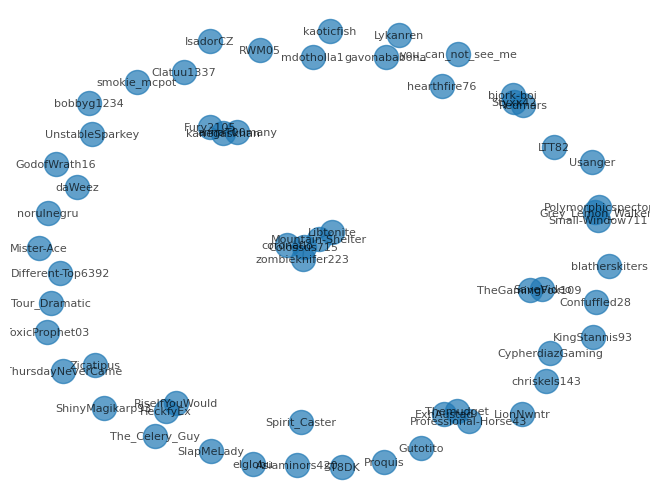

In [12]:

import praw
import networkx as nx
import matplotlib.pyplot as plt

# Create a Reddit instance
reddit = praw.Reddit(
    client_id = "wG4cpR-8WsGSWJWQ6fXMXw",
    client_secret = "CmLsZoes7WotS84gzVVVEOovmYSgGQ",
    user_agent = "Akeiyo_",
)

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    # Add the submission author as a node
    submission_author = submission.author
    if submission_author:
        G.add_node(submission_author.name)

    for comment in submission.comments.list():
        # Skip MoreComments objects
        if isinstance(comment, praw.models.MoreComments):
            continue

        # Check if the comment has a valid author
        if comment.author:
            comment_author = comment.author.name

            # Add comment author as a node
            G.add_node(comment_author)

            # Add an edge between the submission author and the comment author
            if submission_author:
                G.add_edge(submission_author.name, comment_author)
                print(f"Edge: {submission_author.name} -> {comment_author}")

            # Add an edge between the comment and its parent
            parent_comment = comment.parent()
            if parent_comment and parent_comment.author:
                parent_author = parent_comment.author.name
                G.add_edge(comment_author, parent_author)
                print(f"Edge: {comment_author} -> {parent_author}")

    return G


def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  # Set layout algorithm
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

# Choose a subreddit
subreddit_name = "StateofDecay2"
subreddit = reddit.subreddit(subreddit_name)

# Print subreddit information
print_subreddit_info(subreddit)

# Get the top post from the subreddit
post_id = get_top_post_id(subreddit)

# Create social network graph from comments
social_network = create_social_network(post_id)

# Perform social network analysis
perform_social_network_analysis(social_network)

# Visualize the network
visualize_network(social_network)
